# Chap 3

In [3]:
from sklearn import datasets
import numpy as np 

In [10]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y= iris.target
np.unique(y)

array([0, 1, 2])

What stratify does in the code below is that it returns training and test subsets that have the same proportion of class lables in the input

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state= 1,stratify=y)

The n.bicounts() confirms

In [8]:
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


Standardize the data

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_standard = sc.transform(X_train)
X_test_standard = sc.transform(X_test)


## Perceptron

In [12]:
from sklearn.linear_model import Perceptron

In [19]:
ppn = Perceptron(eta0=0.1, random_state=1).fit(X_train_standard,y_train)
y_pred = ppn.predict(X_test_standard)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9777777777777777


In [5]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='Test set')        

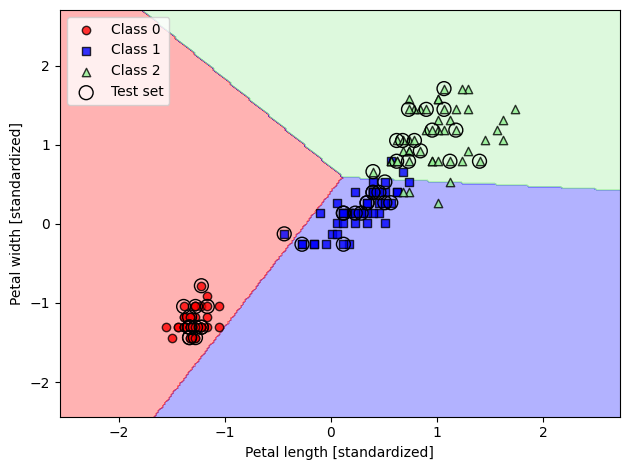

In [23]:
X_combined_std = np.vstack((X_train_standard, X_test_standard)) # np.vstack stack vertically each array on top of each otther
y_combined = np.hstack((y_train, y_test)) #horizontal stack

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('figures/03_01.png', dpi=300)
plt.show()

In [41]:
class LogisticRegression:
    """
    We only have to change the loss function and add the sigmoid activation function 

    """
    def __init__(self,eta = 0.01,n_iter =50, random_state = 3011):
        self.n_iter = n_iter
        self.random_state = random_state
        self.eta = eta
    def input(self,X,y):
        """
        we have to set a random weight and bias to sart out
        then update it based on MSE
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01,size = X.shape[1])#mean = 0, std = 0.1, number of collumns of X
        self.b_ = np.float_(0.) # initial value of the bias =0
        self.errors_=[]
        for _ in range(self.n_iter):
            input_epoch = np.dot(X, self.w_)+self.b_
            activate = self.activation(input_epoch)
            error = y-input_epoch
            self.w_ += self.eta * X.T.dot(error) / X.shape[0]
            self.b_ += self.eta * error.mean()
            loss = (-y.dot(np.log(activate)) - (1 - y).dot(np.log(1 - activate))) / X.shape[0]
            self.errors_.append(np.mean(error**2))
        return self
    def activation(self,z):
         return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    def predict(self,X):
        return np.where(np.dot(X, self.w_)+self.b_>=0.5,1,0)
    

In [42]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

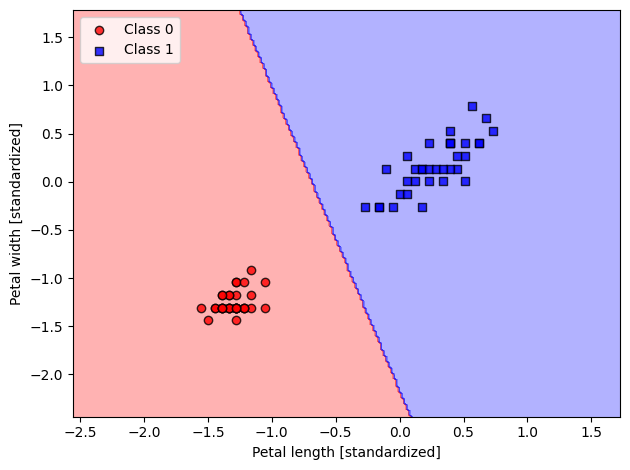

In [43]:
X_train_01_subset = X_train_standard[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegression(eta=0.3, n_iter=1000, random_state=1)
lrgd.input(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

## Training Logistic Regression with Scikit-learn

In [44]:
from sklearn.linear_model import LogisticRegression

The $C$ parameter is proportional to the $\lambda$ parameter of the Ridge (L2) regularization

In [56]:
lr = LogisticRegression(C=100,multi_class= 'ovr',solver='lbfgs')#C=100 is very low regularization
lr.fit(X_train_standard,y_train)

/opt/anaconda3/envs/islp/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=100, multi_class='ovr')

In [57]:
X_test[:3,:]

array([[5.4, 2.3],
       [1.7, 0.4],
       [1.4, 0.3]])

In [60]:
lr.predict_proba(X_test_standard[:3,:])

array([[6.63770505e-09, 1.44747233e-01, 8.55252760e-01],
       [8.34031210e-01, 1.65968790e-01, 3.20815954e-13],
       [8.48822884e-01, 1.51177116e-01, 2.57998350e-14]])

To find the class label, we can use argmax function , which finds the index of the maximum value in an array

In [61]:
lr.predict_proba(X_test_standard[:3,:]).argmax(axis =1)

array([2, 0, 0])

**Note** 
If you want to do prediction on one row, a re-shaping is needed because scikit learn only takes 2D arrays

In [ ]:
lr.predict(X_test_std[0, :].reshape(1, -1))

## SVM

Refer to obsidian page about this for the general formula

In [1]:
def entropy(p):
    return -p*np.log2(p) - (1-p)*np.log2((1-p))

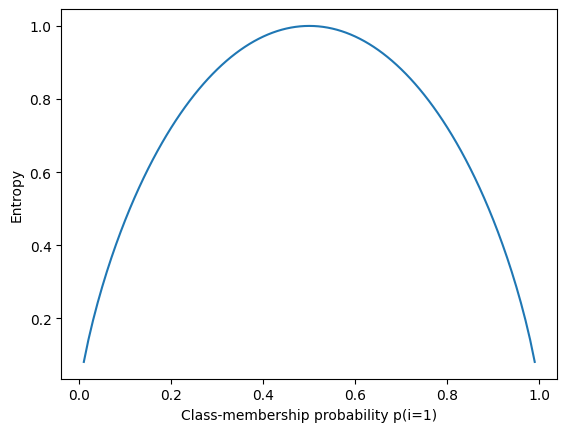

In [6]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None 
       for p in x]

plt.ylabel('Entropy')
plt.xlabel('Class-membership probability p(i=1)')
plt.plot(x, ent)
#plt.savefig('figures/03_26.png', dpi=300)
plt.show()

## Decision Trees

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
tree_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth =4,
    random_state = 1)
tree_model.fit(X_train,y_train)



DecisionTreeClassifier(max_depth=4, random_state=1)

We can also visualize the tree with sklearn

[Text(0.25, 0.9, 'Sepal width <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.1875, 0.8, 'True  '),
 Text(0.375, 0.7, 'Sepal length <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.3125, 0.8, '  False'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5, 'Sepal width <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.3, 'Sepal length <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.3, 'Sepal length <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

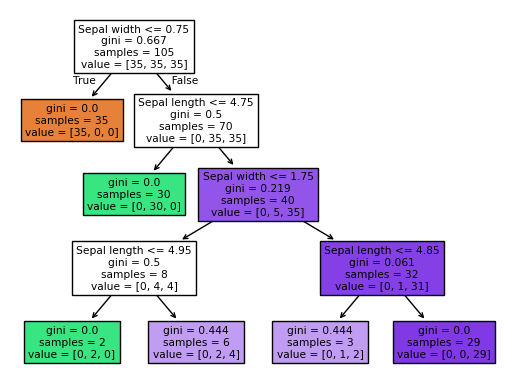

In [21]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width',
                 'Petal length', 'Petal width']

tree.plot_tree(tree_model,feature_names=feature_names, filled = True)

Scikit learn does have a page where you can read more about post-pruning decision trees [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html)
